In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
print("current path:",os.getcwd())
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

current path: /kaggle/working


In [3]:
#set pandas max number of columns to display
pd.set_option('display.max_columns',500)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

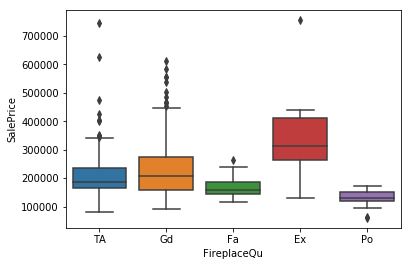

In [8]:
sns.boxplot(train['FireplaceQu'],train['SalePrice'])

In [9]:
# NA in FirePlaceQU means No Fireplace, let's have one more type as None
train['FireplaceQu'].fillna('None',inplace=True)
test['FireplaceQu'].fillna('None',inplace=True)

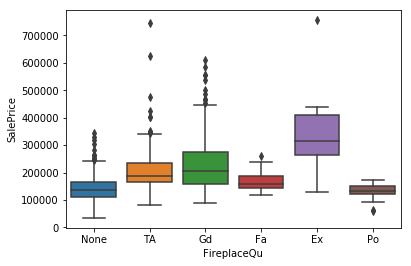

In [10]:
sns.boxplot(train['FireplaceQu'],train['SalePrice'])

In [11]:
#Removing features with more than 50% missing values
#Removing Id column as it will not help the prediction
remove_list = ['PoolQC','MiscFeature','Alley','Fence','Id']
train.drop(remove_list,axis=1,inplace=True)
Ids = test['Id']
Ids
test.drop(remove_list,axis=1,inplace=True)

In [12]:
train.isnull().sum().sort_values(ascending=False)[:20]

LotFrontage     259
GarageFinish     81
GarageType       81
GarageYrBlt      81
GarageCond       81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
RoofMatl          0
Exterior1st       0
ExterQual         0
Exterior2nd       0
YearRemodAdd      0
ExterCond         0
dtype: int64

In [13]:
test.isnull().sum().sort_values(ascending=False)[:30]

LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
Functional         2
BsmtHalfBath       2
Utilities          2
SaleType           1
Exterior2nd        1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior1st        1
SaleCondition      0
RoofStyle          0
dtype: int64

In [14]:
#For some features like Garage Year Built, it's better to fill missing values with most frequent value. But mode of
#  train data and test data may differ. And also checking the data, it's better to look at both test and train data
#Concat train and test data
combined = pd.concat([train,test],axis=0,sort=False)

In [15]:
# Fill numeric missing values of features with mean value
train['LotFrontage'].fillna(combined['LotFrontage'].mean(),inplace=True)
test['LotFrontage'].fillna(combined['LotFrontage'].mean(),inplace=True)
train['MasVnrArea'].fillna(combined['MasVnrArea'].mean(),inplace=True)
test['MasVnrArea'].fillna(combined['MasVnrArea'].mean(),inplace=True)

In [16]:
#test['MSZoning'].fillna('None',inplace=True)

In [17]:
#sns.boxplot(test['MSZoning'],train['SalePrice'])

In [18]:
#combined['MSZoning'].mode()

In [19]:
#If a particular amenity is not present, then it's NA. Let's fill all those missing values with 'None' type. 
# It's better to see each categorical feature to know whether to fill with mode or 'None'. For example, 
# if you boxplot GarageCond and SalePrice, None type's Saleprice is way too less compared to 'TA' type's Saleprice(TA is mode here)
#Uncomment the below line to see the plot
#sns.boxplot(train['GarageCond'],train['SalePrice'])

train['GarageType'].fillna('None',inplace=True)
test['GarageType'].fillna('None',inplace=True)

train['GarageYrBlt'].fillna(combined['GarageYrBlt'].mode()[0],inplace=True)
test['GarageYrBlt'].fillna(combined['GarageYrBlt'].mode()[0],inplace=True)

train['GarageFinish'].fillna(combined['GarageFinish'].mode()[0],inplace=True)
test['GarageFinish'].fillna(combined['GarageFinish'].mode()[0],inplace=True)

train['GarageCond'].fillna('None',inplace=True)
test['GarageCond'].fillna('None',inplace=True)

train['GarageQual'].fillna('None',inplace=True)
test['GarageQual'].fillna('None',inplace=True)

train['BsmtFinType2'].fillna('None',inplace=True)
test['BsmtFinType2'].fillna('None',inplace=True)

train['BsmtExposure'].fillna('None',inplace=True)
test['BsmtExposure'].fillna('None',inplace=True)

train['BsmtFinType1'].fillna('None',inplace=True)
test['BsmtFinType1'].fillna('None',inplace=True)

train['BsmtCond'].fillna('None',inplace=True)
test['BsmtCond'].fillna('None',inplace=True)

train['BsmtQual'].fillna('None',inplace=True)
test['BsmtQual'].fillna('None',inplace=True)

train['MasVnrType'].fillna('None',inplace=True)
test['MasVnrType'].fillna('None',inplace=True)

train['Electrical'].fillna(combined['Electrical'].mode()[0],inplace=True)

test['MSZoning'].fillna(combined['MSZoning'].mode()[0],inplace=True)
test['BsmtFullBath'].fillna(combined['BsmtFullBath'].mode()[0],inplace=True)
test['BsmtHalfBath'].fillna(combined['BsmtHalfBath'].mode()[0],inplace=True)
test['Utilities'].fillna(combined['Utilities'].mode()[0],inplace=True)
test['SaleType'].fillna(combined['SaleType'].mode()[0],inplace=True)
test['Exterior2nd'].fillna(combined['Exterior2nd'].mode()[0],inplace=True)
test['KitchenQual'].fillna(combined['KitchenQual'].mode()[0],inplace=True)
test['GarageCars'].fillna(combined['GarageCars'].mode()[0],inplace=True)
test['GarageArea'].fillna(combined['GarageArea'].mean(),inplace=True)
test['TotalBsmtSF'].fillna(combined['TotalBsmtSF'].mode()[0],inplace=True)
test['BsmtUnfSF'].fillna(combined['BsmtUnfSF'].mode()[0],inplace=True)
test['BsmtFinSF2'].fillna(combined['BsmtFinSF2'].mode()[0],inplace=True)
test['BsmtFinSF1'].fillna(combined['BsmtFinSF1'].mode()[0],inplace=True)
test['Exterior1st'].fillna(combined['Exterior1st'].mode()[0],inplace=True)

In [20]:
# train.GarageYrBlt[train.GarageYrBlt.isnull()]
# train['GarageYrBlt'].fillna(2005,inplace=True)
# train.GarageYrBlt[train.GarageYrBlt.isnull()]
# combined.GarageYrBlt.mode()[0]

In [21]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [22]:
numeric_cols = numeric_corrvalues.index[numeric_corrvalues>0.4]

NameError: name 'numeric_corrvalues' is not defined

In [23]:
categorical_features = train.dtypes[train.dtypes == 'object'].index
print("Categorical features",len(categorical_features))
print(categorical_features)

Categorical features 39
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [24]:
train['SalePrice'][train['MSZoning']=='RL']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1151, dtype: int64

In [25]:
train['MSZoning'].head()

0    RL
1    RL
2    RL
3    RL
4    RL
Name: MSZoning, dtype: object

In [26]:
numeric_corrvalues = train.corr()['SalePrice'].round(2)

In [27]:
import scipy.stats as stats
shorlist_categories = []
for i in categorical_features:
    category_values = []
    for j in train[i].unique():
        #print("  category ",j)
        category_values.append(train['SalePrice'][train[i]==j].to_list())
    f,p = stats.f_oneway(*category_values)
    if p < 0.05 and f >10:
        print(" feature>>>>>>>>>>>>>>>> ",i)
        print("f {}  p {}".format(f,p))
        shorlist_categories.append(i)
    #print(category_values)
print(shorlist_categories, len(shorlist_categories))

 feature>>>>>>>>>>>>>>>>  MSZoning
f 43.84028167245718  p 8.817633866272648e-35
 feature>>>>>>>>>>>>>>>>  LotShape
f 40.13285166226295  p 6.447523852011766e-25
 feature>>>>>>>>>>>>>>>>  LandContour
f 12.850188333283924  p 2.7422167521379096e-08
 feature>>>>>>>>>>>>>>>>  Neighborhood
f 71.78486512058272  p 1.558600282771154e-225
 feature>>>>>>>>>>>>>>>>  BldgType
f 13.011077169620851  p 2.0567364604967015e-10
 feature>>>>>>>>>>>>>>>>  HouseStyle
f 19.595000995981223  p 3.376776535121222e-25
 feature>>>>>>>>>>>>>>>>  RoofStyle
f 17.80549722914421  p 3.653523047099125e-17
 feature>>>>>>>>>>>>>>>>  Exterior1st
f 18.61174286624578  p 2.5860887286376316e-43
 feature>>>>>>>>>>>>>>>>  Exterior2nd
f 17.500839571369834  p 4.8421856706985465e-43
 feature>>>>>>>>>>>>>>>>  MasVnrType
f 108.91130455887651  p 1.2797035312662622e-63
 feature>>>>>>>>>>>>>>>>  ExterQual
f 443.33483141504627  p 1.4395510967787893e-204
 feature>>>>>>>>>>>>>>>>  Foundation
f 100.25385058740888  p 5.791895002232233e-91
 fea

In [28]:
numeric_cols = numeric_cols.to_list()

NameError: name 'numeric_cols' is not defined

In [29]:
columns_to_include = numeric_cols + shorlist_categories

NameError: name 'numeric_cols' is not defined

In [30]:
columns_to_include

NameError: name 'columns_to_include' is not defined

In [31]:
train = train[columns_to_include]
columns_to_include_test = columns_to_include
columns_to_include_test.remove('SalePrice')
columns_to_include_test

NameError: name 'columns_to_include' is not defined

In [32]:
test = test[columns_to_include_test]

NameError: name 'columns_to_include_test' is not defined

In [33]:
def create_dummies(column_name,data):
    df = data.copy()
    print(df.columns)
    print(len(df.columns))
    df = pd.get_dummies(df,columns=[column_name],drop_first=True)
    print(df.columns)
    print(len(df.columns))
    return df

In [34]:
total_df = pd.concat([train,test],axis=0,sort=False)
cat_columns = total_df.select_dtypes(include=['object']).columns

In [35]:

for col in cat_columns:
    total_df = create_dummies(col,total_df)
    print("column:",col)
    print(len(total_df.columns))

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [36]:
print(len(total_df.columns))
total_df = total_df.loc[:,~total_df.columns.duplicated()]
print(len(total_df.columns))
#train.isnull().sum().sort_values(ascending=False)
#test.isnull().sum().sort_values(ascending=False)[:20]
total_df.isnull().sum().sort_values(ascending=False)

246
246


SalePrice                1459
SaleCondition_Partial       0
Neighborhood_Timber         0
Condition2_PosA             0
Condition2_Norm             0
                         ... 
Foundation_Stone            0
Foundation_Slab             0
Foundation_PConc            0
Foundation_CBlock           0
MSSubClass                  0
Length: 246, dtype: int64

In [37]:
train_new = total_df[:1460]
test_new = total_df[1460:]
test_new.drop(['SalePrice'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [39]:
X_train = train_new.drop(['SalePrice'],axis=1)
X_test = test_new
y_train = train_new['SalePrice']


In [40]:
model = xgb.XGBRegressor()

In [41]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[12:18:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [42]:
y_pred = model.predict(X_test)

In [43]:
submission = pd.DataFrame(np.arange(1461,2920),columns=['Id'])

In [44]:
submission['SalePrice'] = y_pred

In [45]:
submission.to_csv('submission.csv',index=False)